## This notebook contains 5 important DP problems and will expand more.
#### Shaolun Du 

## Problem One: 0/1 knapsack problem

Given weights and values of $N$ items, put these items in a knapsack of capacity $W$ to get the maximum total value in the knapsack. 

In other words, given two integer arrays $val[0,...,n-1]$ and $wt[0,...,n-1]$ which represent values and weights associated with $N$ items respectively. Also given an integer $W$ which represents knapsack capacity, find out the maximum value subset of $val[0,...,n]$ such that sum of the weights of this subset is smaller than or equal to W. 

PS: You cannot break an item, either pick the complete item, or don’t pick it (0-1 property).

In [5]:
import numpy as np

In [45]:
# Main program setting starts here:    
N = 6
W = 10
# Inputs ordered by (weights, values)
inputs = [(3,10), (6,14), (2,6), (7,8), (1,1), (7,5)]

The basic logic behind this problem is: 
* We subdivide the total weights into interge one by one the represent the sub-problem
* We select each item one by one from the lowest weight first.

The algorithm looks like:
* Sort the input according to weights
* Build package value matrix row by row
* Transition finction: $$f(i,j) = max(f(i-1,j), f(i-1,j-weight(item_k))+val(item_k))$$

In [44]:
# Step one sort:
inputs = sorted(inputs, key=lambda x:x[0])
# Step two build DP matrix, argumented by one more dimension to simplfy calculation:
DP_f = np.zeros((N+1,W+1), dtype=np.int)

In [30]:
# Step three fill in DP matrix by the transition matrix:
# Loop over all items
for i in range(1,N+1):
    # Loop over all possible weights
    for j in range(1, W+1):
        cur_weight = inputs[i-1][0]
        cur_value = inputs[i-1][1]
        if cur_weight > j:
            DP_f[i][j] = DP_f[i-1][j]
        else:
            DP_f[i][j] = max(DP_f[i-1][j], DP_f[i-1][j-inputs[i-1][0]]+inputs[i-1][1])
print(DP_f)

[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  1  1  1  1  1  1  1]
 [ 0  1  6  7  7  7  7  7  7  7  7]
 [ 0  1  6 10 11 16 17 17 17 17 17]
 [ 0  1  6 10 11 16 17 17 20 24 25]
 [ 0  1  6 10 11 16 17 17 20 24 25]
 [ 0  1  6 10 11 16 17 17 20 24 25]]


## Now let us do a follow-up question:
If we are allowed to select as many as each item as we want, then what the answer gonna be?
* We will use binary representation to generate all possible value within a given value
* Try to use binary representation of this problem: inputs=[(weights, values)]

In [46]:
# Binary representation of each item value within the threshold W weights
W = 10
inputs = [(3,10), (6,14), (2,6), (7,8), (1,1), (7,5)]
inputs = sorted(inputs, key = lambda x:x[0])
for ele in inputs:
    i = 1
    while pow(2,i)*ele[0] <= W:
        inputs.append((pow(2,i)*ele[0], pow(2,i)*ele[1]))
        i += 1

In [47]:
# Re-run the previous algorithm with new inputs:
N = len(inputs)
DP_f = np.zeros((N+1,W+1), dtype=np.int)
for i in range(1,N+1):
    # Loop over all possible weights
    for j in range(1, W+1):
        cur_weight = inputs[i-1][0]
        cur_value = inputs[i-1][1]
        if cur_weight > j:
            DP_f[i][j] = DP_f[i-1][j]
        else:
            DP_f[i][j] = max(DP_f[i-1][j], DP_f[i-1][j-inputs[i-1][0]]+inputs[i-1][1])
print(DP_f)

[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  1  1  1  1  1  1  1]
 [ 0  1  6  7  7  7  7  7  7  7  7]
 [ 0  1  6 10 11 16 17 17 17 17 17]
 [ 0  1  6 10 11 16 17 17 20 24 25]
 [ 0  1  6 10 11 16 17 17 20 24 25]
 [ 0  1  6 10 11 16 17 17 20 24 25]
 [ 0  1  6 10 11 16 17 18 20 24 25]
 [ 0  1  6 10 11 16 17 18 20 24 25]
 [ 0  1  6 10 11 16 17 18 20 24 25]
 [ 0  1  6 10 12 16 18 22 23 28 29]
 [ 0  1  6 10 12 16 18 22 24 28 30]
 [ 0  1  6 10 12 16 20 22 26 30 32]
 [ 0  1  6 10 12 16 20 22 26 30 32]
 [ 0  1  6 10 12 16 20 22 26 30 32]
 [ 0  1  6 10 12 16 20 22 26 30 32]
 [ 0  1  6 10 12 16 20 22 26 30 32]
 [ 0  1  6 10 12 16 20 22 26 30 32]]


## Problem Two: LCS --- Longest Common Subsequence

Given two strings with str_1 = "asdfew...." and str_2 = "regrge....". We want to find out the longest common subsequence between them.

PS: The subsequence may not be continuous.

In [48]:
# Main program setting starts here:    
str_1 = "abscjfutg"
str_2 = "gnehsvavfjetg"

The basic logic behind this problem is:
* We subdivide those two strings into sub string with str_1[0:i] and str_2[0:j]
* Then we compare and determine the longest common subsequence between str_1[0:i] and str_2[0:j]

The algorithm looks like this:
* Build DP matrix with size (len(str_1)+1, len(str_2)+1)
* Compare str_1[i] == str_2[j]: if equal $\rightarrow$ LCS+1 if not $\rightarrow$ LCS = max(DP(i-1,j), DP(i,j-1))

In [50]:
N1 = len(str_1)
N2 = len(str_2)
DP = np.zeros((N1+1,N2+1), dtype = np.int)
for i in range(1, N1+1):
    for j in range(1, N2+1):
        if str_1[i-1] == str_2[j-1]:
            DP[i][j] = DP[i-1][j-1] +1
        else:
            DP[i][j] = max(DP[i-1][j], DP[i][j-1])
print(DP)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 2 2 2 2]
 [0 0 0 0 0 1 1 1 1 2 2 2 2 2]
 [0 0 0 0 0 1 1 1 1 2 2 2 2 2]
 [0 0 0 0 0 1 1 1 1 2 2 2 3 3]
 [0 1 1 1 1 1 1 1 1 2 2 2 3 4]]


In [67]:
# Trace back to get corresponding sub-strings
# We have to walk backwards from the right corner to the left corner
ans = []
i, j = N1, N2
while i > 0 and j > 0:
    if DP[i][j] != DP[i-1][j] and DP[i][j] != DP[i][j-2] and DP[i-1][j] == DP[i][j-1]:
        ans.append(str_2[j-1])
        i -= 1
        j -= 1
    # !!!: Pay attention here when we walk backwards 
    # The priority should be row first then column 
    elif DP[i-1][j] > DP[i][j-1]:
        i -= 1
    elif DP[i-1][j] <= DP[i][j-1]:
        j -= 1
print("".join(ans))

gtfs


## Problem Three: Egg Dropping 

“Figure out the highest floor of a 100-floor building an egg can be dropped without breaking,  given two eggs”

The Egg Dropping Puzzle is a mathematical puzzle that has been around the internet for some time now, which is known to be adopted in interviews of major companies like Google, Microsoft, Accenture and even Hewlett Packard.

You are to determine the $minimum$ number of attempts required in the worst case scenario to find the critical floor.

* Example: if we have 6 floors and two egges then we would like to drop the first egg on, say, third floor instead of 6 or 1 floor.

In [68]:
# Main program setting starts here:    
N = 100

The basic logic behind this problem is:
* We can subdivide the floor number with integer from 1 to 100
* We drop these eggs in a sequence always try the first one 
* After the first egg's result has been viewed we can use the knowledge to find out the other one's situation

The algorithm looks like this:
* Initialize a DP matrix with two rows and N+1 columns
* Fill in the first row with almost known value
* Fill in the second row with transition function: $$DP[2][k] = min[max(DP[1][N-i],DP[1][i-1]),\ \ i= 1,2,3....,k]$$

In [84]:
DP = np.arange(0,N+1)
DP = np.vstack((DP, np.zeros((1,N+1), dtype=np.int)))
# Restrict our problem by floor = i.
for i in range(1, 101):
    if i <= 2:
        DP[1][i] = DP[0][i]
    else:
        # Find the possible maximum array and then take the min of it
        all_case = [max(DP[0][k-1],DP[1][i-k]) for k in range(1,i+1)]
        DP[1][i] = min(all_case) + 1
print(DP)

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
   36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
   54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
   72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
   90  91  92  93  94  95  96  97  98  99 100]
 [  0   1   2   2   3   3   3   4   4   4   4   5   5   5   5   5   6   6
    6   6   6   6   7   7   7   7   7   7   7   8   8   8   8   8   8   8
    8   9   9   9   9   9   9   9   9   9  10  10  10  10  10  10  10  10
   10  10  11  11  11  11  11  11  11  11  11  11  11  12  12  12  12  12
   12  12  12  12  12  12  12  13  13  13  13  13  13  13  13  13  13  13
   13  13  14  14  14  14  14  14  14  14  14]]


## Problem Four: Maximum profit by buying and selling a share at most k times

In share trading, a buyer buys shares and sells on future date. 

Given stock price of n days, the trader is allowed to make at most k transactions, where new transaction can only start after previous transaction is complete, find out maximum profit that a share trader could have made.

In [105]:
# Main program setting starts here:    
Price = [10, 22, 5, 75, 65, 80, 100, 1, 99, 102]
K = 5

The basic logic behind this problem is:
* We want to keep track of the number of trascations and days with max-profit
* We use DP table to get a transition matrix 
* If we do a transcation on j_th day then we have to update its profit with previous table
* If we do not do a transcation on j_th day then the max value is just the previous day value

The algorithm looks like this:
* Using $T[i][j]$ to represent the max-profit of i_th transcation and j_th day
* $$ T[i][j] = max\{ T[i][j-1], ( price[j] - price[m] + T[i-1][m]\ \  m = 1,2,3...,j-1 ) \} $$

This problem is quite similar to the egg dropping problem in the sense that:
* We keep finding the largest possible profit by looping over all possible transactions from day 0 to day j-1

In [110]:
DP = np.zeros((K+1, len(Price)), dtype = np.int)
for i in range(1, K+1):
    for j in range(1, len(Price)):
        if j == 1:
            pre_max = Price[j]-Price[j-1]+DP[i-1][j-1]
        else:
            pre_max = max([Price[j]-Price[m]+DP[i-1][m] for m in range(0, j-1)])
        DP[i][j] = max(DP[i][j-1], pre_max)
print(DP)

[[  0   0   0   0   0   0   0   0   0   0]
 [  0  12  12  65  65  75  95  95  95 101]
 [  0  12  12  65  72  87 107 107 107 196]
 [  0  12  12  65  72  87 107 107 107 208]
 [  0  12  12  65  72  87 107 107 107 208]
 [  0  12  12  65  72  87 107 107 107 208]]


## Problem Five: Minimum number of jumps to reach end

Given an array of integers where each element represents the max number of steps that can be made forward from that element. 

Write a function to return the minimum number of jumps to reach the end of the array (starting from the first element). 

If an element is 0, then cannot move through that element.

In [111]:
# Main program setting starting here:
# Driver Program to test above function
arr = [1, 3, 6, 1, 0, 9]
size = len(arr)

In [112]:
def minJumps(arr, n):
    jumps = [0 for i in range(n)]
    
    if (n == 0) or (arr[0] == 0):
        return float('inf')
 
    jumps[0] = 0
 
    # Find the minimum number of 
    # jumps to reach arr[i] from 
    # arr[0] and assign this 
    # value to jumps[i]
    for i in range(1, n):
        jumps[i] = float('inf')
        for j in range(i):
            if (i <= j + arr[j]) and (jumps[j] != float('inf')):
                jumps[i] = min(jumps[i], jumps[j] + 1)
                break
    return jumps[n-1]

In [113]:
print(minJumps(arr, size))

3


In [144]:
arr = [1, 3, 6, 1, 0, 9]
size = len(arr)
DP = np.zeros(size, dtype = np.int)
for i in range(1, size):
    DP[i] = min([DP[j]+1 if arr[j]+j >= i else 10000 for j in range(0,i)])
print(DP)

[0 1 2 2 2 3]


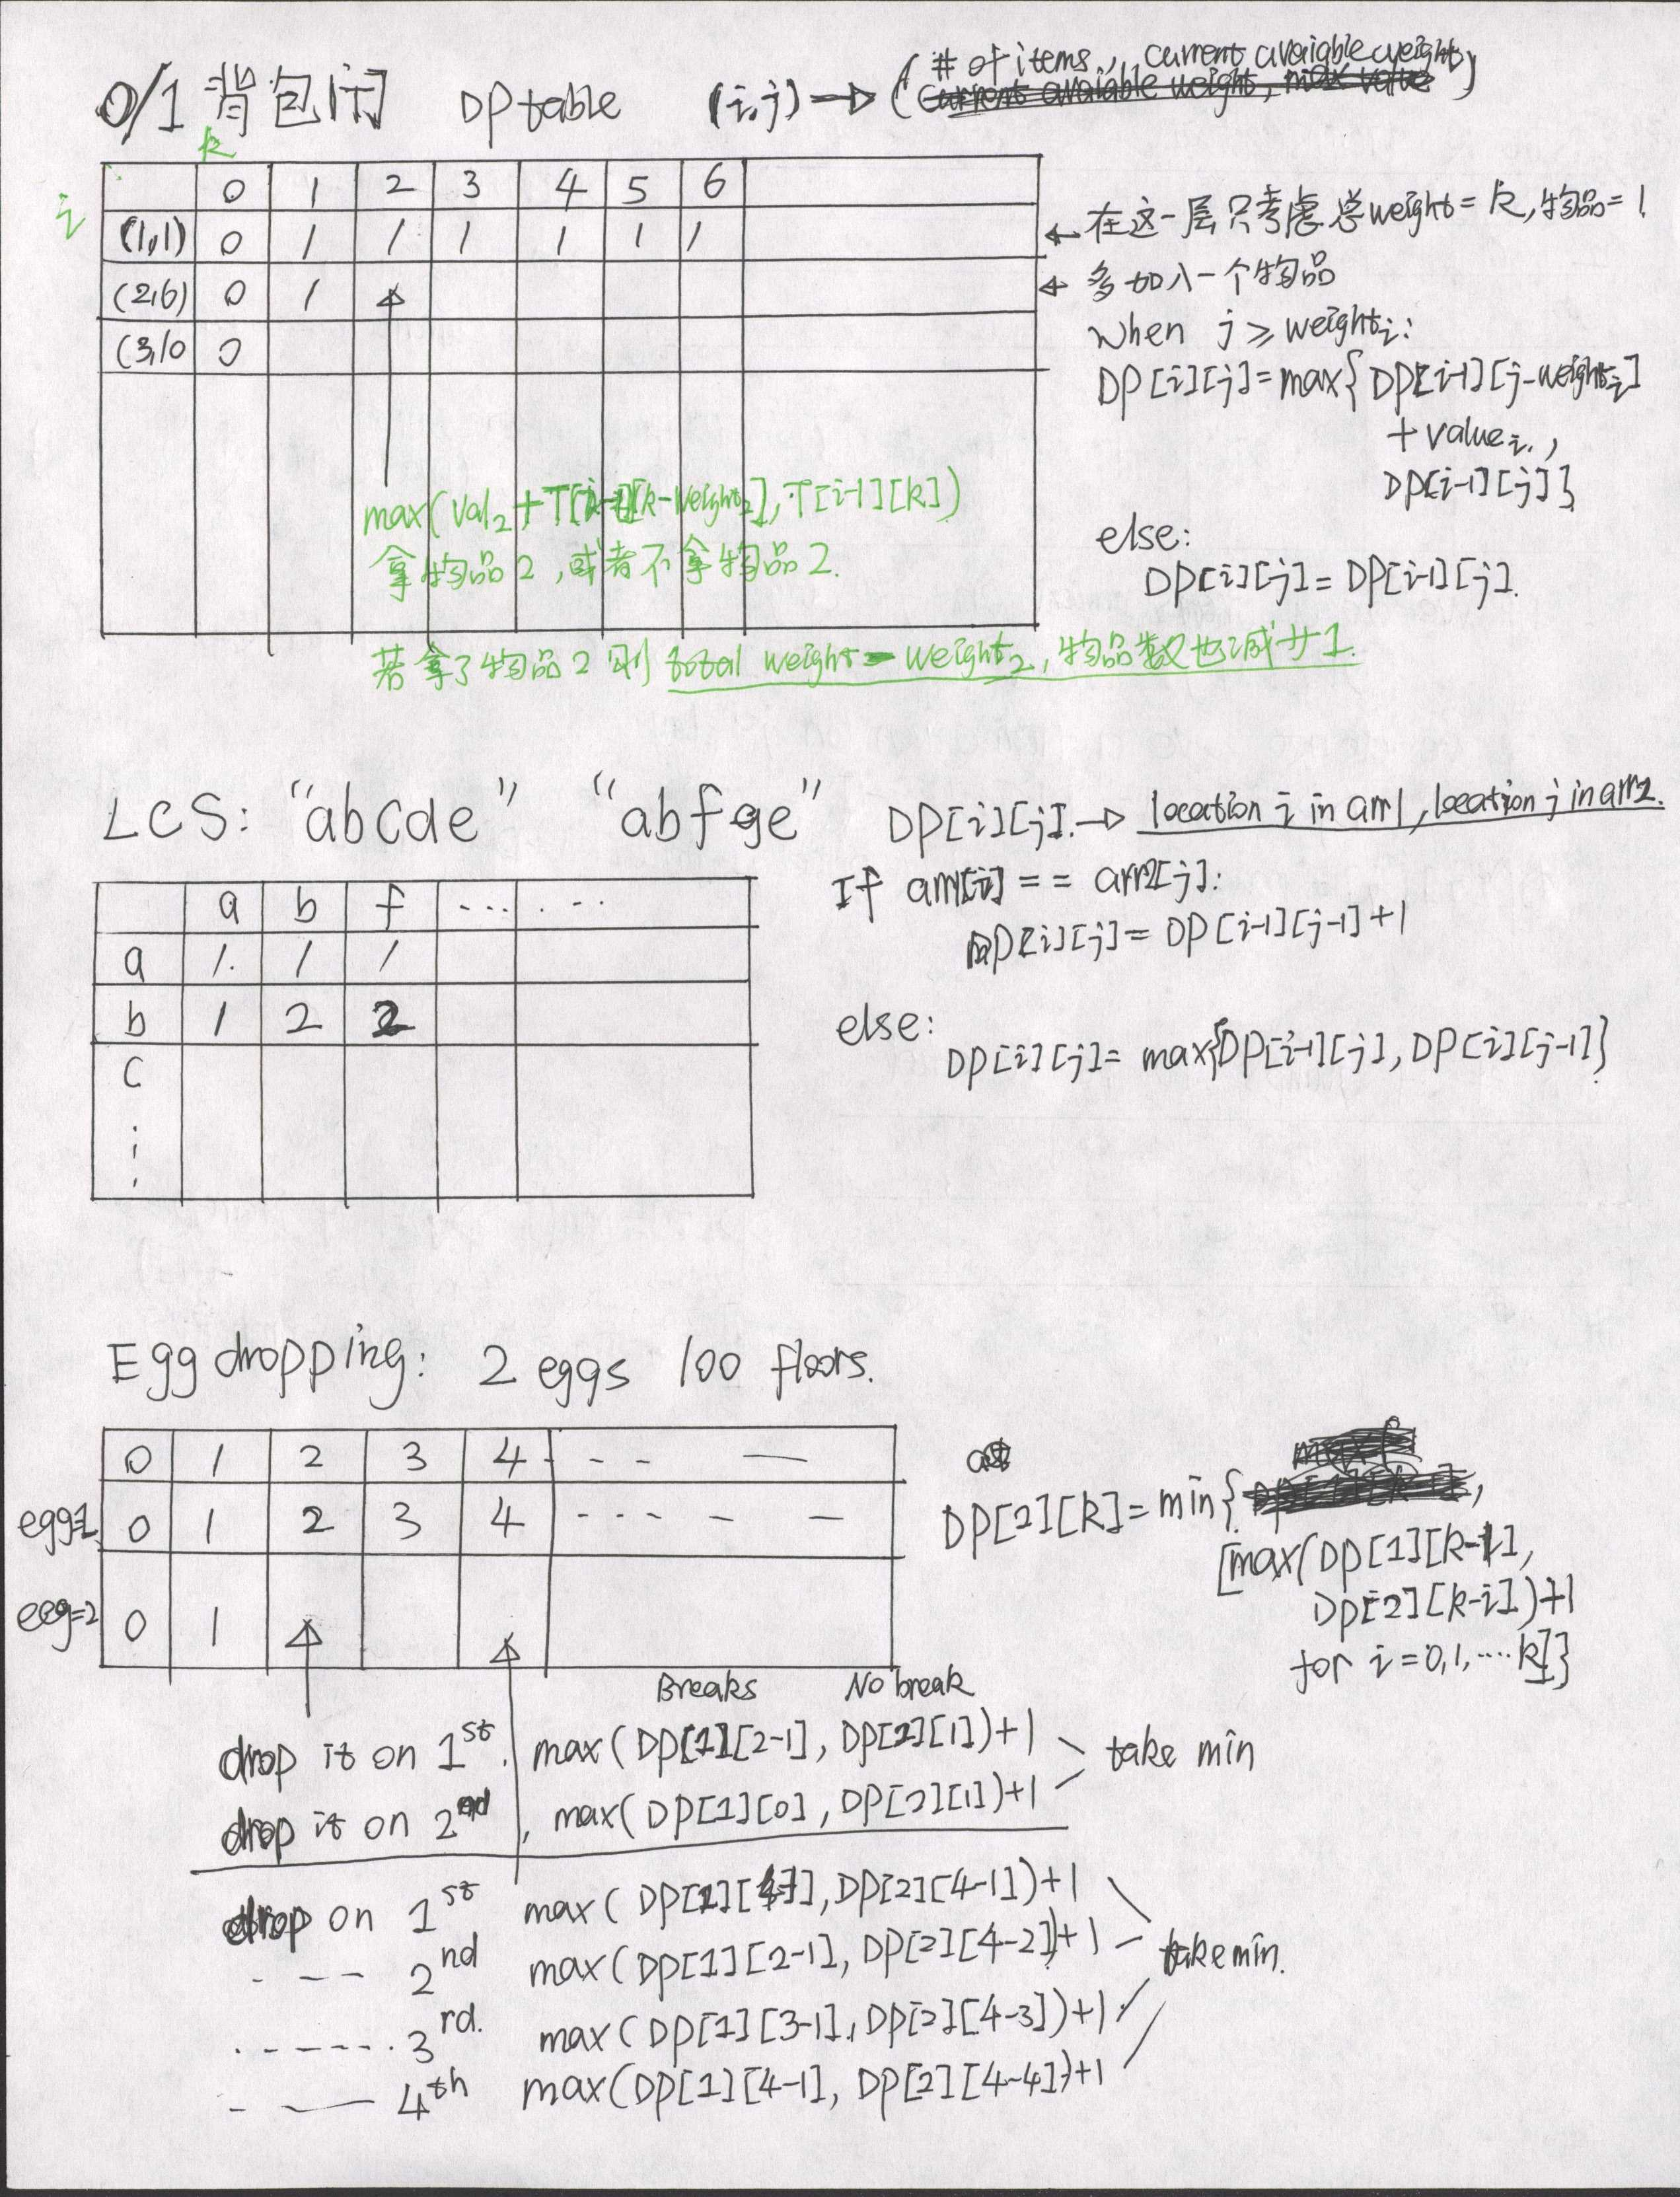

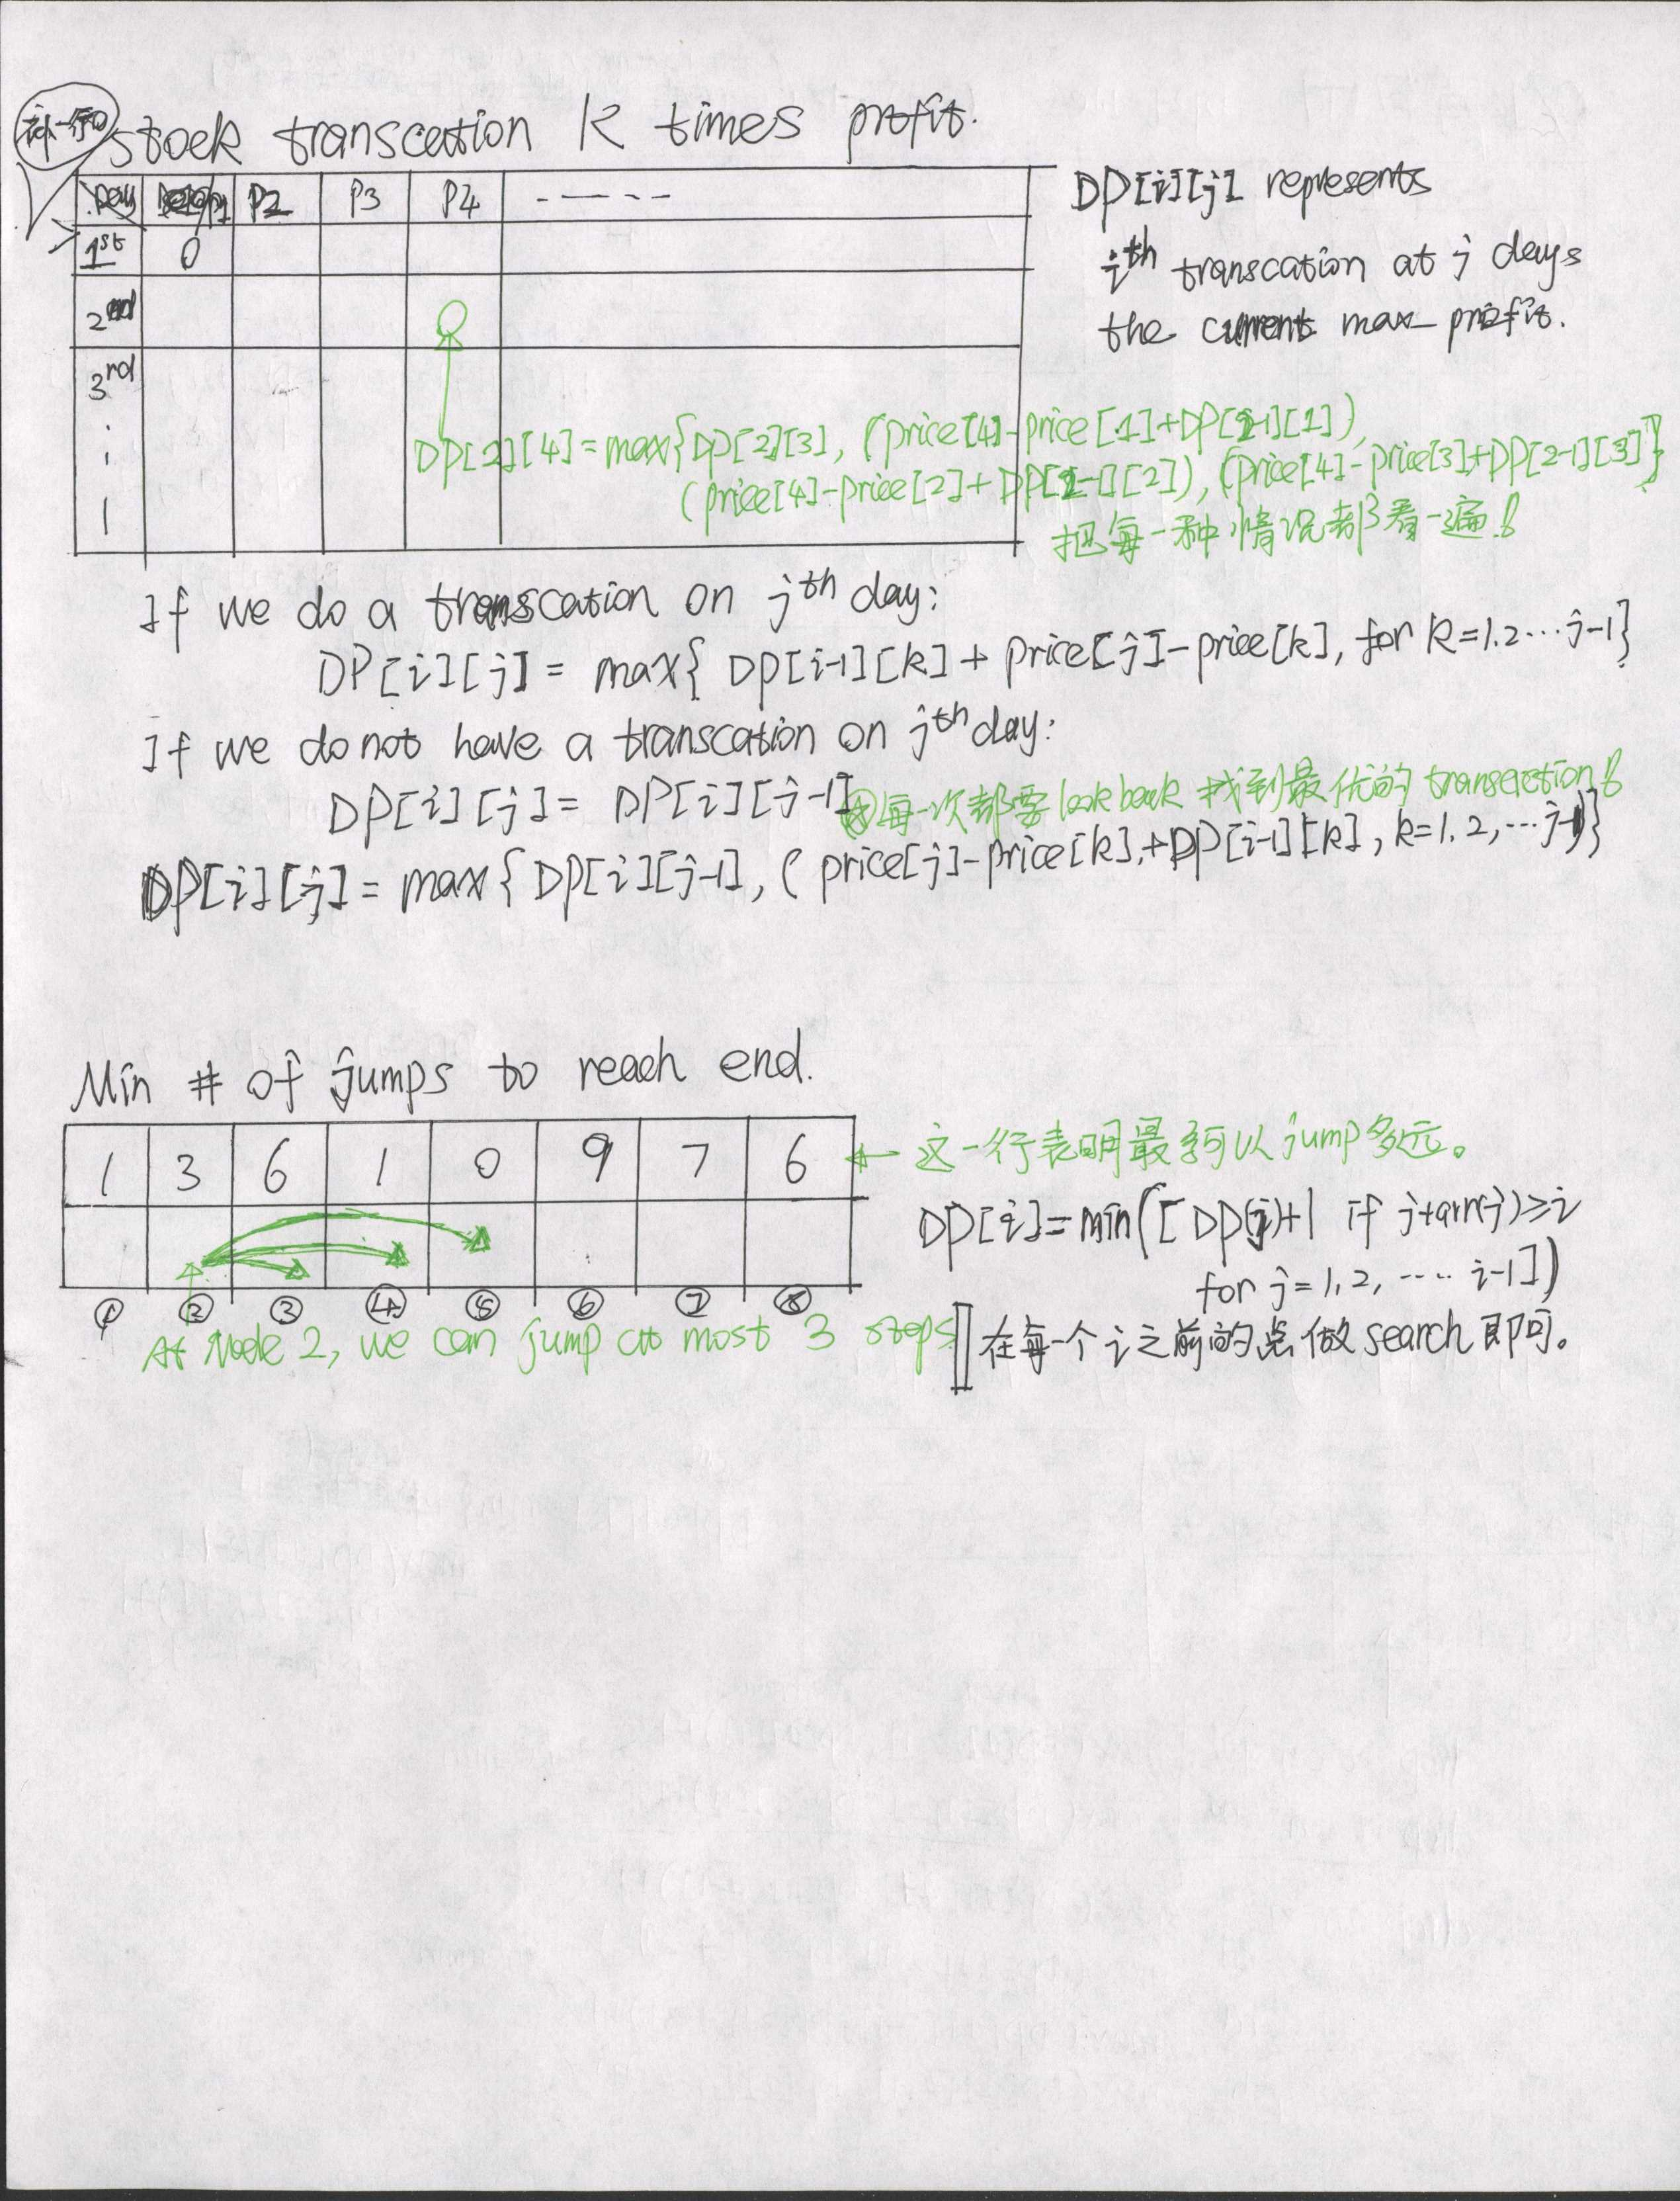